## 先測試看看可不可以work，再寫成函式

In [104]:
import requests
url="http://finance.google.com/finance/historical"
params={}
params['q']='AAPL'
params['startdate']='2015-01-01'
params['enddate']='2017-01-01'
params['output']='csv'

r=requests.get(url,params=params).content

In [105]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(r.decode('utf-8')))

In [106]:
data.head()

,Date,Open,High,Low,Close,Volume
0,30-Dec-16,116.65,117.20,115.43,115.82,30586265
1,29-Dec-16,116.45,117.11,116.40,116.73,15039519
2,28-Dec-16,117.52,118.02,116.20,116.76,20905892
3,27-Dec-16,116.52,117.80,116.49,117.26,18296855
4,23-Dec-16,115.59,116.52,115.59,116.52,14249484


## Q1 寫成函式囉，設計有報錯功能

In [107]:
def MyGoodleReader(symbol,startdate,enddate):
    import pandas as pd
    import io
    import requests
    url="http://finance.google.com/finance/historical"
    params={}
    params['q']=symbol
    params['startdate']=startdate
    params['enddate']=enddate
    params['output']='csv'
    r=requests.get(url,params=params)
    if r.status_code == 200:
        r=r.content
        data=pd.read_csv(io.StringIO(r.decode('utf-8')))
        return data
    else:
        print("ERROR")
    

In [108]:
CanItWork=MyGoodleReader('AAPL','2014-01-01','2017-10-01')
CanItWork.head()

,Date,Open,High,Low,Close,Volume
0,29-Sep-17,153.21,154.13,152.00,154.12,26299810
1,28-Sep-17,153.89,154.28,152.70,153.28,22005455
2,27-Sep-17,153.80,154.72,153.54,154.23,25182779
3,26-Sep-17,151.78,153.92,151.69,153.14,36660045
4,25-Sep-17,149.99,151.83,149.16,150.55,44387336


In [109]:
CanItWorkAgain=MyGoodleReader('AAAA','2014-01-01','2017-10-01')

ERROR


## Q2 抓取台股股價

### 想法1（日後實現）利用證交所資料處理，麻煩，但是正確穩定


http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date=20171207&stockNo=2330
#### 這個URL可以抓取台積電單月的股價csv
#### 如果可以清洗出數據部分，然後利用迴圈抓取並合併，應該可行

In [114]:
url='http://www.twse.com.tw/exchangeReport/STOCK_DAY?response=csv&date=20171207&stockNo=2330'
r=requests.get(url)
print(r.text)

"106年12月 2330 台積電           各日成交資訊"
"日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數",
"106/12/01","38,356,265","8,830,392,980","228.50","233.50","227.50","231.00","+5.00","17,632",
"106/12/04","22,939,032","5,347,622,547","232.50","234.50","231.00","234.00","+3.00","7,763",
"106/12/05","30,189,765","6,938,661,754","231.00","231.00","228.50","229.50","-4.50","11,202",
"106/12/06","34,031,690","7,752,572,207","228.00","229.50","226.50","227.00","-2.50","10,749",
"說明:"
"符號說明:+/-/X表示漲/跌/不比價"
"當日統計資訊含一般、零股、盤後定價、鉅額交易，不含拍賣、標購。"
"ETF證券代號第六碼為K、M、S、C者，表示該ETF以外幣交易。"




### 想法2 用yahoo fin，不穩定，但是很簡單很快



In [4]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
df = web.DataReader('2330.TW', 'yahoo',datetime(2017, 2, 14))

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-13,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-14,189.0,190.0,187.5,187.5,181.451614,45696000.0
2017-02-15,187.0,189.5,186.5,189.0,182.903229,39347000.0
2017-02-16,190.0,190.5,188.0,189.0,182.903229,27018000.0
2017-02-17,190.0,190.5,189.0,189.5,183.387100,20389000.0


### 來畫圖
https://zhuanlan.zhihu.com/p/29519040
### 這個畫得很不錯，日後研究（老師的也很棒）

In [7]:
import kchart as kt

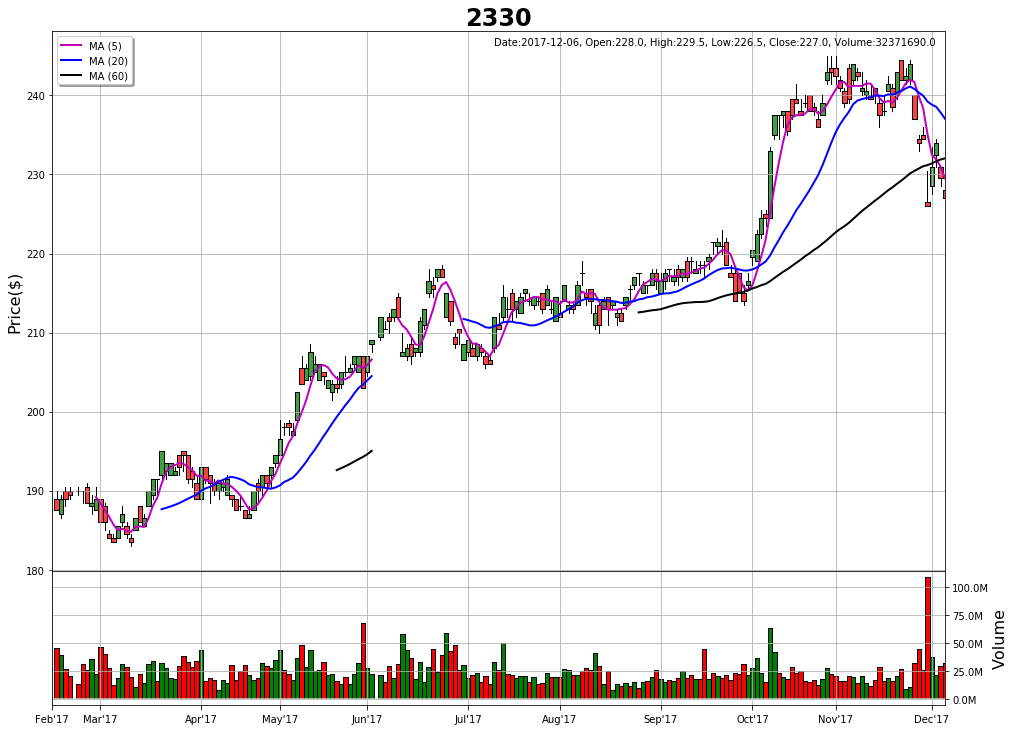

In [8]:
kt.draw(df,"2330")